# Assignment 2 | Dockerfile and Data Analysis with Popular Books Dataset

## Importing Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Dataset into a pandas Dataframe

In [2]:
df = pd.read_csv("books.csv")
df

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
4,12,13335037,13335037,13155899,210,62024035,9.780062e+12,Veronica Roth,2011.0,Divergent,...,1903563,2216814,101023,36315,82870,310297,673028,1114304,https://images.gr-assets.com/books/1328559506m...,https://images.gr-assets.com/books/1328559506s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,9925,86737,86737,3877968,52,1582349177,9.781582e+12,Mary Hoffman,2002.0,City of Masks,...,12048,13385,555,314,758,3154,4872,4287,https://images.gr-assets.com/books/1294870497m...,https://images.gr-assets.com/books/1294870497s...
1350,9937,13010211,13010211,18171867,22,1596435712,9.781596e+12,Caragh M. O'Brien,2012.0,Promised,...,11766,12884,1260,256,1098,3565,4392,3573,https://images.gr-assets.com/books/1330546217m...,https://images.gr-assets.com/books/1330546217s...
1351,9942,16074758,16074758,21869436,18,1442486597,9.781442e+12,"Abigail Haas, Abby McDonald",2013.0,Dangerous Girls,...,10439,12970,2631,203,553,2029,4567,5618,https://images.gr-assets.com/books/1356513050m...,https://images.gr-assets.com/books/1356513050s...
1352,9947,21393526,21393526,40690062,19,62320521,9.780062e+12,Maria Dahvana Headley,2015.0,Magonia,...,12510,13652,2910,577,1440,3881,4772,2982,https://images.gr-assets.com/books/1413479866m...,https://images.gr-assets.com/books/1413479866s...


## Info & Exploratory Statistics of the Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1354 entries, 0 to 1353
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    1354 non-null   int64  
 1   goodreads_book_id          1354 non-null   int64  
 2   best_book_id               1354 non-null   int64  
 3   work_id                    1354 non-null   int64  
 4   books_count                1354 non-null   int64  
 5   isbn                       1302 non-null   object 
 6   isbn13                     1310 non-null   float64
 7   authors                    1354 non-null   object 
 8   original_publication_year  1351 non-null   float64
 9   original_title             1302 non-null   object 
 10  title                      1354 non-null   object 
 11  language_code              1245 non-null   object 
 12  average_rating             1354 non-null   float64
 13  ratings_count              1354 non-null   int64

In [4]:
df.describe()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,1354.000000,1.354000e+03,1.354000e+03,1.354000e+03,1354.000000,1.310000e+03,1351.000000,1354.000000,1.354000e+03,1.354000e+03,1354.000000,1354.000000,1354.000000,1354.000000,1.354000e+03,1.354000e+03
mean,4453.584195,5.951852e+06,6.120589e+06,8.707028e+06,50.330871,9.766700e+12,2003.422650,3.999357,9.160429e+04,9.915569e+04,5151.093058,2297.409158,5005.615953,17528.918021,3.060591e+04,4.371784e+04
std,2894.277455,6.664595e+06,6.935008e+06,9.813696e+06,61.338867,3.572069e+11,16.779301,0.224263,2.871266e+05,3.023637e+05,10730.335273,13708.507239,16259.838433,43549.306920,8.427851e+04,1.610638e+05
min,1.000000,1.000000e+00,1.000000e+00,1.150000e+02,1.000000,7.678361e+10,1868.000000,3.230000,6.221000e+03,8.833000e+03,49.000000,33.000000,133.000000,826.000000,1.660000e+03,2.005000e+03
25%,1860.250000,1.537868e+05,1.537962e+05,1.375035e+06,22.000000,9.780152e+12,2003.000000,3.850000,1.759325e+04,1.918150e+04,1162.500000,306.000000,978.000000,4140.500000,6.360500e+03,6.981500e+03
50%,4177.500000,3.305318e+06,3.422646e+06,4.005716e+06,37.000000,9.780440e+12,2008.000000,4.000000,2.943000e+04,3.255150e+04,2208.000000,619.000000,1732.500000,6557.000000,1.079550e+04,1.182650e+04
75%,6814.500000,9.917380e+06,1.019388e+07,1.435717e+07,58.000000,9.780805e+12,2011.000000,4.160000,6.073800e+04,6.681275e+04,4690.750000,1355.000000,3644.500000,13312.250000,2.227500e+04,2.612400e+04
max,9955.000000,3.207567e+07,3.360215e+07,4.963819e+07,1314.000000,9.788424e+12,2017.000000,4.740000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


## Pre-processing
### Removing missing values

In [5]:
print(df.isnull().sum())

book_id                        0
goodreads_book_id              0
best_book_id                   0
work_id                        0
books_count                    0
isbn                          52
isbn13                        44
authors                        0
original_publication_year      3
original_title                52
title                          0
language_code                109
average_rating                 0
ratings_count                  0
work_ratings_count             0
work_text_reviews_count        0
ratings_1                      0
ratings_2                      0
ratings_3                      0
ratings_4                      0
ratings_5                      0
image_url                      0
small_image_url                0
dtype: int64


In [6]:
df.dropna(inplace=True)
print(df.isnull().sum())

book_id                      0
goodreads_book_id            0
best_book_id                 0
work_id                      0
books_count                  0
isbn                         0
isbn13                       0
authors                      0
original_publication_year    0
original_title               0
title                        0
language_code                0
average_rating               0
ratings_count                0
work_ratings_count           0
work_text_reviews_count      0
ratings_1                    0
ratings_2                    0
ratings_3                    0
ratings_4                    0
ratings_5                    0
image_url                    0
small_image_url              0
dtype: int64


## Removing duplicate values

In [7]:
print("Number of duplicate entries:")
print(df.duplicated().sum())
print("No duplicates to be removed!")

Number of duplicate entries:
0
No duplicates to be removed!


## Finding all Harry Potter Series related titles

In [8]:
titles = df.title.unique()
hp_titles = [i for i in titles if i.find('Harry Potter') != -1]
hp_titles

["Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
 'Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)',
 'Harry Potter and the Order of the Phoenix (Harry Potter, #5)',
 'Harry Potter and the Chamber of Secrets (Harry Potter, #2)',
 'Harry Potter and the Goblet of Fire (Harry Potter, #4)',
 'Harry Potter and the Deathly Hallows (Harry Potter, #7)',
 'Harry Potter and the Half-Blood Prince (Harry Potter, #6)',
 'Harry Potter Boxset (Harry Potter, #1-7)',
 'Harry Potter Collection (Harry Potter, #1-6)',
 'The Magical Worlds of Harry Potter: A Treasury of Myths, Legends, and Fascinating Facts']

## Finding Harry Potter Books

In [9]:
hp_books = df.loc[df.title.isin(hp_titles)]
hp_books = hp_books.sort_values(by=['original_publication_year'])
hp_books

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
9,23,15881,15881,6231171,398,439064864,9.780439e+12,"J.K. Rowling, Mary GrandPré",1998.0,Harry Potter and the Chamber of Secrets,...,1779331,1906199,34172,8253,42251,242345,548266,1065084,https://images.gr-assets.com/books/1474169725m...,https://images.gr-assets.com/books/1474169725s...
96,422,862041,862041,2962492,76,545044251,9.780545e+12,J.K. Rowling,1998.0,Complete Harry Potter Boxed Set,...,190050,204125,6508,1105,1285,7020,30666,164049,https://images.gr-assets.com/books/1392579059m...,https://images.gr-assets.com/books/1392579059s...
6,18,5,5,2402163,376,043965548X,9.780440e+12,"J.K. Rowling, Mary GrandPré, Rufus Beck",1999.0,Harry Potter and the Prisoner of Azkaban,...,1832823,1969375,36099,6716,20413,166129,509447,1266670,https://images.gr-assets.com/books/1499277281m...,https://images.gr-assets.com/books/1499277281s...
10,24,6,6,3046572,332,439139600,9.780439e+12,"J.K. Rowling, Mary GrandPré",2000.0,Harry Potter and the Goblet of Fire,...,1753043,1868642,31084,6676,20210,151785,494926,1195045,https://images.gr-assets.com/books/1361482611m...,https://images.gr-assets.com/books/1361482611s...
1036,7018,483445,483445,471792,42,042519891X,9.780425e+12,David Colbert,2001.0,The Magical Worlds of Harry Potter: A Treasury...,...,13820,15145,267,329,1125,3766,3593,6332,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
8,21,2,2,2809203,307,439358078,9.780439e+12,"J.K. Rowling, Mary GrandPré",2003.0,Harry Potter and the Order of the Phoenix,...,1735368,1840548,28685,9528,31577,180210,494427,1124806,https://images.gr-assets.com/books/1387141547m...,https://images.gr-assets.com/books/1387141547s...
12,27,1,1,41335427,275,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,...,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
613,3753,10,10,21457570,6,439827604,9.780440e+12,J.K. Rowling,2005.0,"Harry Potter Collection (Harry Potter, #1-6)",...,24618,26274,882,203,186,946,3891,21048,https://images.gr-assets.com/books/1328867351m...,https://images.gr-assets.com/books/1328867351s...
11,25,136251,136251,2963218,263,545010225,9.780545e+12,"J.K. Rowling, Mary GrandPré",2007.0,Harry Potter and the Deathly Hallows,...,1746574,1847395,51942,9363,22245,113646,383914,1318227,https://images.gr-assets.com/books/1474171184m...,https://images.gr-assets.com/books/1474171184s...


## Select important columns for Data Analysis

In [10]:
selected_columns = ['title', 'authors', 'original_publication_year', 'average_rating', 'ratings_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5']
hp_books = hp_books[selected_columns]
hp_books

,title,authors,original_publication_year,average_rating,ratings_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
1,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",1997.0,4.44,4602479,75504,101676,455024,1156318,3011543
9,Harry Potter and the Chamber of Secrets (Harry...,"J.K. Rowling, Mary GrandPré",1998.0,4.37,1779331,8253,42251,242345,548266,1065084
96,"Harry Potter Boxset (Harry Potter, #1-7)",J.K. Rowling,1998.0,4.74,190050,1105,1285,7020,30666,164049
6,Harry Potter and the Prisoner of Azkaban (Harr...,"J.K. Rowling, Mary GrandPré, Rufus Beck",1999.0,4.53,1832823,6716,20413,166129,509447,1266670
10,Harry Potter and the Goblet of Fire (Harry Pot...,"J.K. Rowling, Mary GrandPré",2000.0,4.53,1753043,6676,20210,151785,494926,1195045
1036,The Magical Worlds of Harry Potter: A Treasury...,David Colbert,2001.0,3.96,13820,329,1125,3766,3593,6332
8,Harry Potter and the Order of the Phoenix (Har...,"J.K. Rowling, Mary GrandPré",2003.0,4.46,1735368,9528,31577,180210,494427,1124806
12,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré",2005.0,4.54,1678823,7308,21516,136333,459028,1161491
613,"Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,2005.0,4.73,24618,203,186,946,3891,21048
11,Harry Potter and the Deathly Hallows (Harry Po...,"J.K. Rowling, Mary GrandPré",2007.0,4.61,1746574,9363,22245,113646,383914,1318227


## Average rating of Harry Potter books

In [11]:
hp_books['average_rating'].mean()

4.491

## Best-Selling Books in order

In [12]:
hp_books_best_sellers = hp_books[['title', 'authors', 'original_publication_year', 'average_rating', 'ratings_count']].sort_values(by=['ratings_count'], ascending=False)
hp_books_best_sellers

,title,authors,original_publication_year,average_rating,ratings_count
1,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",1997.0,4.44,4602479
6,Harry Potter and the Prisoner of Azkaban (Harr...,"J.K. Rowling, Mary GrandPré, Rufus Beck",1999.0,4.53,1832823
9,Harry Potter and the Chamber of Secrets (Harry...,"J.K. Rowling, Mary GrandPré",1998.0,4.37,1779331
10,Harry Potter and the Goblet of Fire (Harry Pot...,"J.K. Rowling, Mary GrandPré",2000.0,4.53,1753043
11,Harry Potter and the Deathly Hallows (Harry Po...,"J.K. Rowling, Mary GrandPré",2007.0,4.61,1746574
8,Harry Potter and the Order of the Phoenix (Har...,"J.K. Rowling, Mary GrandPré",2003.0,4.46,1735368
12,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré",2005.0,4.54,1678823
96,"Harry Potter Boxset (Harry Potter, #1-7)",J.K. Rowling,1998.0,4.74,190050
613,"Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,2005.0,4.73,24618
1036,The Magical Worlds of Harry Potter: A Treasury...,David Colbert,2001.0,3.96,13820


## Extra Stats
### Average ratings (max, min, std, ...)

In [13]:
hp_books['average_rating'].describe()

count    10.000000
mean      4.491000
std       0.220829
min       3.960000
25%       4.445000
50%       4.530000
75%       4.592500
max       4.740000
Name: average_rating, dtype: float64

### Pie Charts for rating distribution across different books

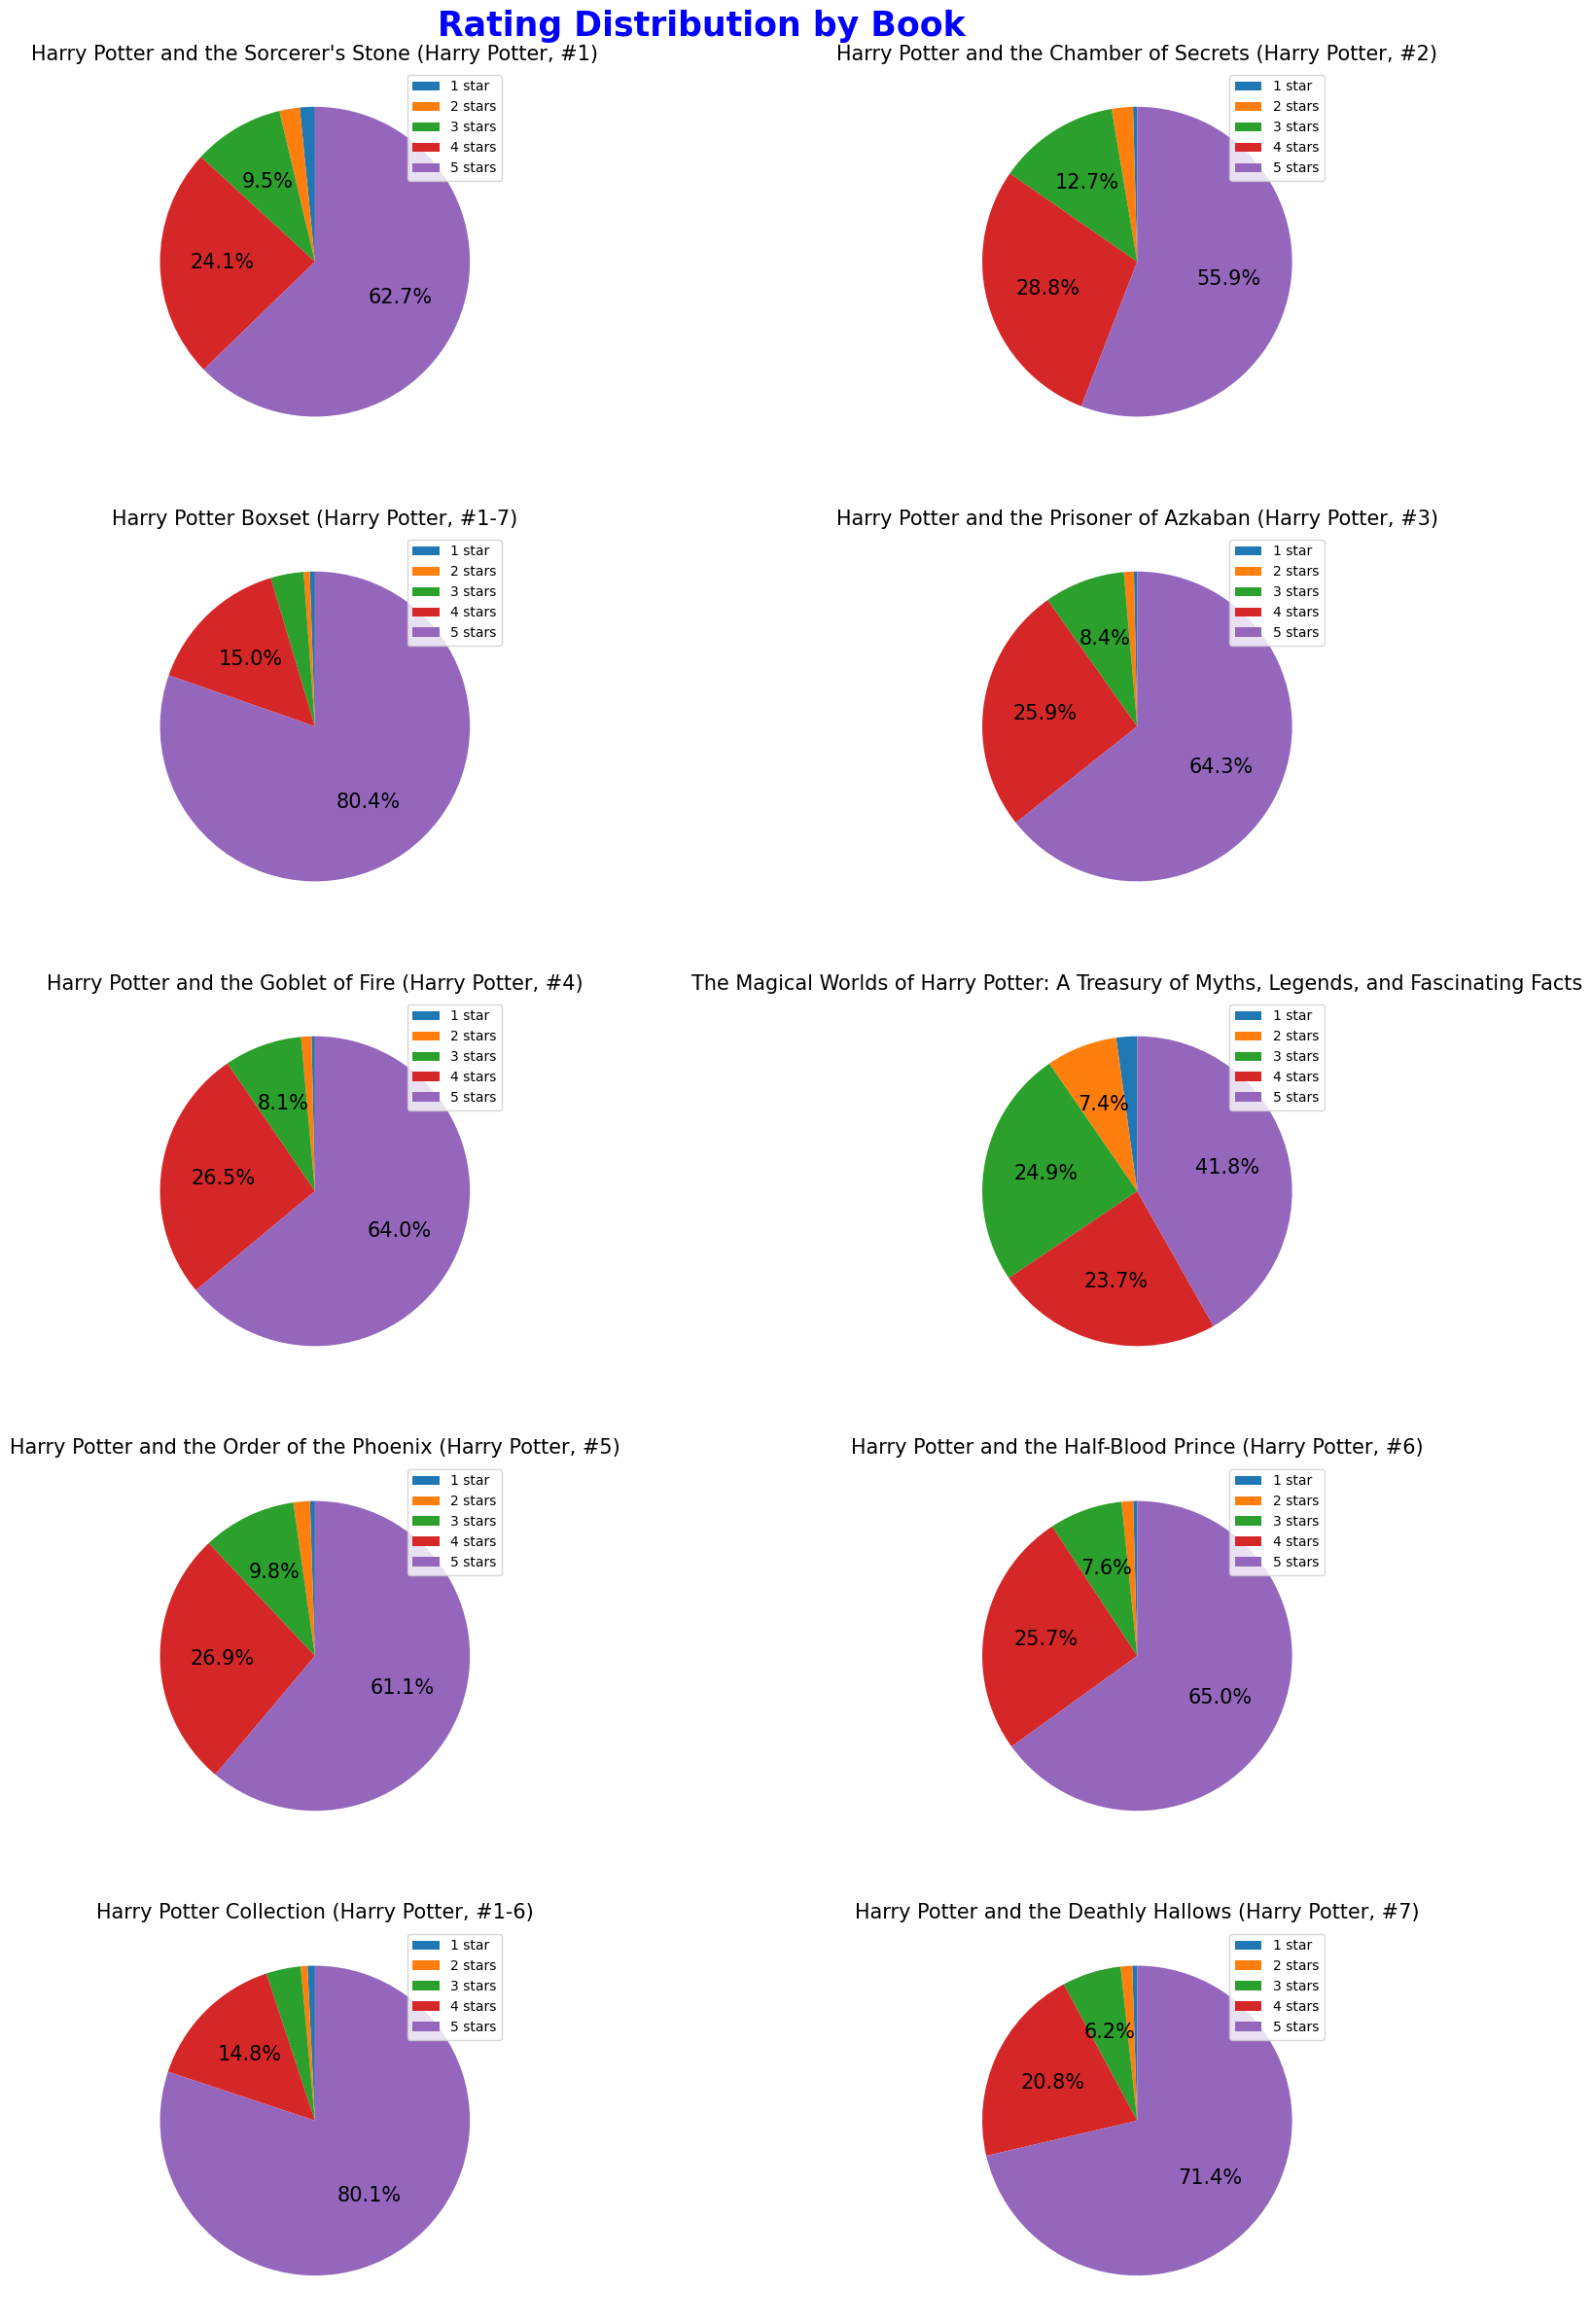

In [14]:
fig, axs = plt.subplots(5, 2, figsize=(20, 30))
fig.suptitle('Rating Distribution by Book', y=0.9, fontsize=25, fontweight='bold', color='blue')
k = 0
label_threshold = 5

for i in range(5):
    for j in range(2):
        book = hp_books['title'].iloc[k]
        ratings = hp_books[['ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5']].iloc[k]
        axs[i,j].pie(ratings, autopct=lambda p: f'{p:.1f}%' if p >= label_threshold else '', startangle=90, textprops={'fontsize': 15}, radius=1)
        axs[i,j].set_title(book, fontsize=15)
        axs[i,j].legend(['1 star', '2 stars', '3 stars', '4 stars', '5 stars'], loc='upper right', fontsize=10)
        k += 1
        
plt.show()

### Histogram for average ratings

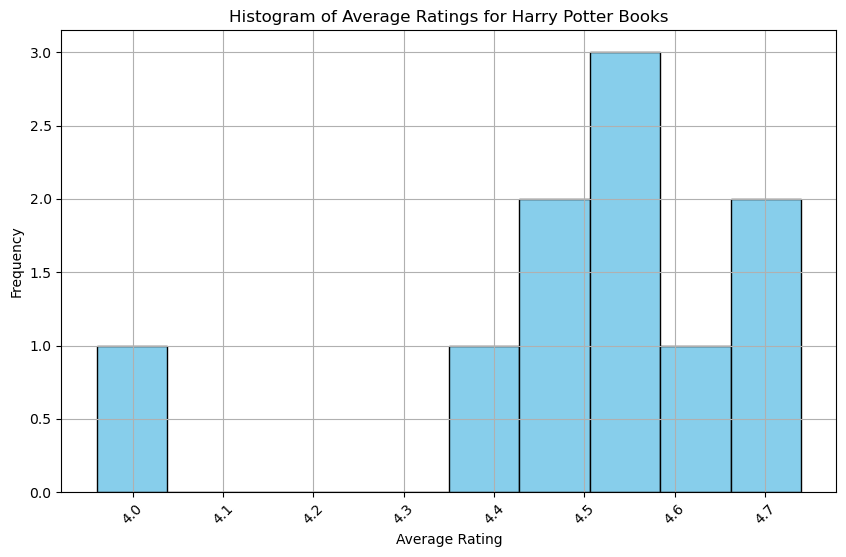

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(hp_books['average_rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Average Ratings for Harry Potter Books')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()